# Importing Libraries

In [214]:
#data
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#view
import matplotlib.pyplot as plt
import seaborn as sns

#model neural network
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError as mse

# Datasets

In [215]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test  = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
sample_submition = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

# Exploratory Data Analysis

# Separating Column y for model

In [216]:
y_train = train['SalePrice']

In [217]:
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [218]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


# Concat train and test for simultaneous tratment

In [219]:
train_for_treatment = train.drop('SalePrice', axis=1)

In [220]:
df = pd.concat([train_for_treatment, test])

In [221]:
df.shape

(2919, 80)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

# Treatment Outlier

In [223]:
#replace outliers for nan

def replace_outlier(df):

    dtypes = df.dtypes.to_dict() 
    for colname, typ in dtypes.items():
       if (typ != 'object'):

         if (colname != 'Id') and (colname != 'SalePrice'):
           z_mean = df[colname].mean()  
           z_std  = df[colname].std() #standart deviation

           z_corte_min = z_mean - 2.5 * z_std
           z_corte_max = z_mean + 2.5 * z_std

           for i in range(len(df)):
             if ((df.iloc[i][colname] < z_corte_min) or (df.iloc[i][colname] > z_corte_max)):
                df.iloc[i][colname] = np.nan

    return df

In [224]:
df = replace_outlier(df)

/tmp/ipykernel_32/2329550581.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[i][colname] = np.nan


# Drop Columns

In [225]:
df.shape

(2919, 80)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [227]:
#column index
df = df.drop('Id', axis=1)

In [228]:
#columns with cont of null values more than 600
null_qtd = df.isnull().sum()
null_qtd = np.array(null_qtd[null_qtd > 600].index)
df = df.drop(null_qtd, axis=1)

# Data Visualization


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2917 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemodAdd 

In [230]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


{'whiskers': [<matplotlib.lines.Line2D at 0x792bde970850>,
 'caps': [<matplotlib.lines.Line2D at 0x792bde971030>,
 'boxes': [<matplotlib.lines.Line2D at 0x792bde9732e0>],
 'medians': [<matplotlib.lines.Line2D at 0x792bde971d80>],
 'fliers': [<matplotlib.lines.Line2D at 0x792bcc1da5c0>],
 'means': []}

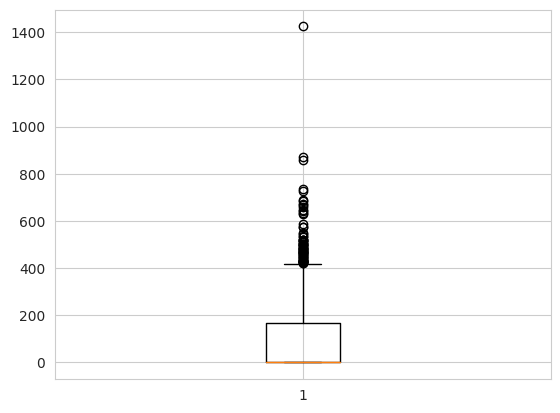

In [231]:
sns.set_style('whitegrid')

plt.boxplot(df['WoodDeckSF'])

# Treatment columns with categorical data


In [232]:
dtypes = df.dtypes.to_dict()

for col_name, typ in dtypes.items():
    if (typ == 'object'):
        print(col_name, typ)
        df = pd.get_dummies(df, columns=[col_name], dtype = int)

MSZoning object
Street object
LotShape object
LandContour object
Utilities object
LotConfig object
LandSlope object
Neighborhood object
Condition1 object
Condition2 object
BldgType object
HouseStyle object
RoofStyle object
RoofMatl object
Exterior1st object
Exterior2nd object
ExterQual object
ExterCond object
Foundation object
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinType2 object
Heating object
HeatingQC object
CentralAir object
Electrical object
KitchenQual object
Functional object
GarageType object
GarageFinish object
GarageQual object
GarageCond object
PavedDrive object
SaleType object
SaleCondition object


In [233]:
df.shape

(2919, 266)

# treatment null values

In [234]:
#replace null values to mean of column
dtypes = df.dtypes.to_dict()

for col_name, typ in dtypes.items():
  df[col_name] = df[col_name].fillna(df[col_name].interpolate(method='linear'))

# Norm Data

In [235]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [236]:
# dtypes = df.dtypes.to_dict()

# for col_name, typ in dtypes.items():
#     if (typ != 'bool'):
#         print(col_name, typ)
#         df[col_name] = df[col_name]/df[col_name].iloc[0]

In [237]:
#drop columns with data out range
#df = df.dropna(axis = 1)

# Split Data

In [238]:
x_train = df.iloc[:1460, :]
x_test_submit = df.iloc[1460:, :]

In [239]:
x_train.shape

(1460, 266)

In [240]:
x_test_submit.shape

(1459, 266)

# Padronização Data

In [241]:
x_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,...,0,0,0,1,0,0,0,0,1,0


In [242]:
x_test_submit

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [243]:
scaler = StandardScaler()

x_padrao = scaler.fit_transform(x_train) 
x_test_padrao = scaler.transform(x_test_submit)

In [244]:
x_padrao = pd.DataFrame(x_padrao,columns = x_train.columns, index = x_train.index)
x_test_padrao = pd.DataFrame(x_test_padrao, columns = x_test_submit.columns, index = x_test_submit.index)

In [245]:
x_padrao.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.225902,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511514,0.575425,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.425052,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.573359,1.171992,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,-0.095711,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323322,0.092907,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,-0.442886,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.573359,-0.499274,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.073375,0.598640,0.375148,1.374795,-0.517200,0.951632,0.733308,1.363915,0.463568,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [246]:
x_test_padrao.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.872563,0.425052,0.110763,-0.795151,0.381743,-0.340077,-1.156380,-0.573359,0.053428,0.604293,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.468449,0.375850,-0.071836,0.381743,-0.439440,-1.301740,0.024428,1.051363,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,0.164670,0.332053,-0.795151,-0.517200,0.852269,0.636400,-0.573359,0.761852,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.073375,0.338258,-0.054002,-0.071836,0.381743,0.885390,0.636400,-0.462658,0.347326,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
4,1.492282,-1.180634,-0.552407,1.374795,-0.517200,0.686666,0.345679,-0.573359,-0.396190,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


# Building Neural Network with Keras

In [247]:
input_shape = [x_train.shape[1]]

In [248]:
input_shape

[266]

In [249]:

model = tf.keras.Sequential([
 
    tf.keras.layers.Dense(units=134, activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=134, activation='relu'),
    tf.keras.layers.Dense(units=134, activation='relu'),
    tf.keras.layers.Dense(units=134, activation='relu'),
    tf.keras.layers.Dense(units=1, activation = 'linear')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 134)               35778     
                                                                 
 dense_18 (Dense)            (None, 134)               18090     
                                                                 
 dense_19 (Dense)            (None, 134)               18090     
                                                                 
 dense_20 (Dense)            (None, 134)               18090     
                                                                 
 dense_21 (Dense)            (None, 1)                 135       
                                                                 
Total params: 90,183
Trainable params: 90,183
Non-trainable params: 0
_________________________________________________________________


In [250]:
# from keras import backend as K
# def root_mean_squared_error(y_true, y_pred):
#         return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [251]:
# def root_mean_squared_error(y_true, y_pred):
#         return K.sqrt(K.mean(K.square(y_pred - y_true))) 



In [252]:
# model.compile(optimizer = "rmsprop", 
#               loss = root_mean_squared_error, 
#               metrics =["accuracy"])

In [253]:
# from keras.losses import mean_squared_error

# def root_mean_squared_error(y_true, y_pred):
#     return K.sqrt(mean_squared_error(y_true, y_pred))

# model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
#           metrics =["accuracy"])

In [254]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss=tf.keras.losses.MeanSquaredError(reduction = 'auto', name = 'mean_squared_error'),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

In [255]:
losses = model.fit(x_padrao, y_train,
                   batch_size=100, 
                   epochs=1000,  
                   )

Epoch 1/1000
15/15 [==============================] - 1s 4ms/step - loss: 39036841984.0000 - rmse: 197577.4375
Epoch 2/1000
15/15 [==============================] - 0s 4ms/step - loss: 39003279360.0000 - rmse: 197492.4844
Epoch 3/1000
15/15 [==============================] - 0s 5ms/step - loss: 38711681024.0000 - rmse: 196752.8438
Epoch 4/1000
15/15 [==============================] - 0s 4ms/step - loss: 37066657792.0000 - rmse: 192527.0312
Epoch 5/1000
15/15 [==============================] - 0s 5ms/step - loss: 30656946176.0000 - rmse: 175091.2500
Epoch 6/1000
15/15 [==============================] - 0s 5ms/step - loss: 15936833536.0000 - rmse: 126241.1719
Epoch 7/1000
15/15 [==============================] - 0s 5ms/step - loss: 6010827776.0000 - rmse: 77529.5312
Epoch 8/1000
15/15 [==============================] - 0s 5ms/step - loss: 3144644608.0000 - rmse: 56077.1328
Epoch 9/1000
15/15 [==============================] - 0s 5ms/step - loss: 1986724736.0000 - rmse: 44572.6914
Epoch 1

# Testando Modelo

In [261]:
y_pred_train = model.predict(x_padrao)


46/46 [==============================] - 0s 2ms/step


In [257]:
from sklearn.metrics import accuracy_score

In [260]:
result = model.evaluate(x_padrao, y_train)

46/46 [==============================] - 0s 2ms/step - loss: 1541979.5000 - rmse: 1241.7646


In [264]:
resultado = pd.DataFrame()

resultado["y"] = y_train
resultado["y_pred_train"] = y_pred_train          #valores preditos para o conjunto de treinamento
resultado.reset_index(inplace = True, drop=True)